In [48]:
import pandas as pd
%matplotlib inline

In [4]:
import json 

In [7]:
path="/home/topo/repos/ghub/pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt"

In [9]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [10]:
records = [json.loads(line) for line in open(path)]


In [16]:
records[:2]

[{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  u'al': u'en-US,en;q=0.8',
  u'c': u'US',
  u'cy': u'Danvers',
  u'g': u'A6qOVH',
  u'gr': u'MA',
  u'h': u'wfLQtf',
  u'hc': 1331822918,
  u'hh': u'1.usa.gov',
  u'l': u'orofrog',
  u'll': [42.576698, -70.954903],
  u'nk': 1,
  u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  u't': 1331923247,
  u'tz': u'America/New_York',
  u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {u'a': u'GoogleMaps/RochesterNY',
  u'c': u'US',
  u'cy': u'Provo',
  u'g': u'mwszkS',
  u'gr': u'UT',
  u'h': u'mwszkS',
  u'hc': 1308262393,
  u'hh': u'j.mp',
  u'l': u'bitly',
  u'll': [40.218102, -111.613297],
  u'nk': 0,
  u'r': u'http://www.AwareMap.com/',
  u't': 1331923249,
  u'tz': u'America/Denver',
  u'u': u'http://www.monroecounty.gov/etc/911/rss.php'}]

In [21]:
records[0]['tz']

u'America/New_York'

In [23]:
tzones = [rec['tz'] for rec in records if 'tz' in rec]

In [29]:
tzones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [30]:
len(tzones)

3440

In [31]:
#Counting Time Zones with pandas

In [32]:
from pandas import DataFrame, Series

In [33]:
df = DataFrame(records)

In [35]:
df[:2]['tz']

0    America/New_York
1      America/Denver
Name: tz, dtype: object

In [37]:
df['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [39]:
tz_counts = df['tz'].value_counts()

In [41]:
tz_counts[:12]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Europe/Berlin            28
Europe/Rome              27
Name: tz, dtype: int64

In [42]:
clean_tz = df['tz'].fillna('Missing')

In [44]:
clean_tz[clean_tz == ''] ='Unknown'

In [45]:
clean_tz_counts = clean_tz.value_counts()
print clean_tz_counts

America/New_York                  1251
Unknown                            521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Asia/Hong_Kong                      10
Europe/Prague                       10
Europe/Helsinki          

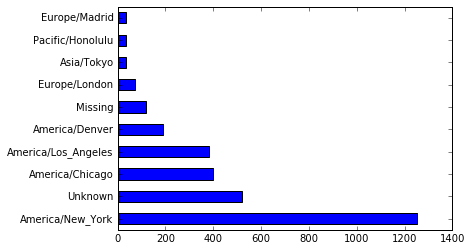

In [49]:
clean_tz_counts[:10].plot(kind='barh')


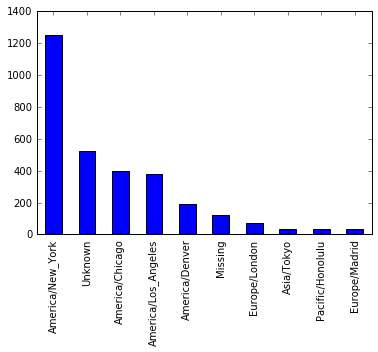

In [50]:
clean_tz_counts[:10].plot(kind='bar')

In [53]:
df['a'][:5]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [55]:
t = df['a'][5]

In [56]:
print t

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11


In [58]:
t.split()[0]

u'Mozilla/5.0'

In [59]:
results = Series([x.split()[0] for x in df.a.dropna()])

In [60]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
Goldfire                                                2
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
Acoon                                                   2
BlackBerry9530/5.0.0.328                                1
Opera/9.64(Windows                                      1
LG-GW382f/V10d                                          1
BlackBerry9700

In [62]:
df.a.notnull().value_counts()

True     3440
False     120
Name: a, dtype: int64

In [66]:
df_notnull = df[df.a.notnull()]
print df_notnull.a.notnull().value_counts()

True    3440
Name: a, dtype: int64


In [67]:
import numpy as np


In [69]:
os_type = np.where(df_notnull['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [71]:
os_type

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], 
      dtype='|S11')

In [72]:
by_tz_os = df_notnull.groupby(['tz', os_type])

In [74]:
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [78]:
agg_counts = by_tz_os.size().unstack().fillna(0)
print agg_counts[:10]

                                Not Windows  Windows
tz                                                  
                                        245      276
Africa/Cairo                              0        3
Africa/Casablanca                         0        1
Africa/Ceuta                              0        2
Africa/Johannesburg                       0        1
Africa/Lusaka                             0        1
America/Anchorage                         4        1
America/Argentina/Buenos_Aires            1        0
America/Argentina/Cordoba                 0        1
America/Argentina/Mendoza                 0        1


In [81]:
#column wise sums
agg_counts.sum(axis=0)

Not Windows    1194
Windows        2246
dtype: float64

In [90]:
#row wise sums i.e. add "windows" and "not windows" columns
agg_counts.sum(axis=1)[:10]

tz
                                  521
Africa/Cairo                        3
Africa/Casablanca                   1
Africa/Ceuta                        2
Africa/Johannesburg                 1
Africa/Lusaka                       1
America/Anchorage                   5
America/Argentina/Buenos_Aires      1
America/Argentina/Cordoba           1
America/Argentina/Mendoza           1
dtype: float64

In [91]:
order = agg_counts.sum(axis=1).argsort()

In [84]:
agg_counts.sum(axis=1)[-10:]

tz
Europe/Sofia         1
Europe/Stockholm    14
Europe/Uzhgorod      1
Europe/Vienna        6
Europe/Vilnius       2
Europe/Volgograd     1
Europe/Warsaw       16
Europe/Zurich        4
Pacific/Auckland    11
Pacific/Honolulu    36
dtype: float64

In [95]:
subset = agg_counts.take(order)[-10:]
print subset

                     Not Windows  Windows
tz                                       
America/Sao_Paulo             13       20
Europe/Madrid                 16       19
Pacific/Honolulu               0       36
Asia/Tokyo                     2       35
Europe/London                 43       31
America/Denver               132       59
America/Los_Angeles          130      252
America/Chicago              115      285
                             245      276
America/New_York             339      912


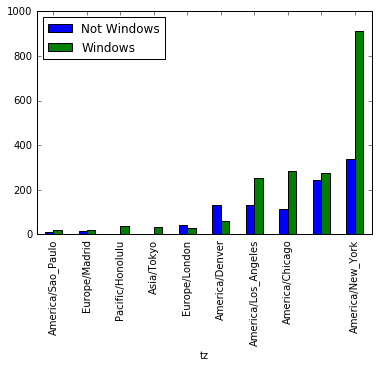

In [97]:
subset.plot(kind='bar')

In [100]:
#sum row-wise and get total, then divide by 
normed_subset = subset.div(subset.sum(axis=1), axis=0)

In [99]:
normed_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,0.393939,0.606061
Europe/Madrid,0.457143,0.542857
Pacific/Honolulu,0.000000,1.000000
Asia/Tokyo,0.054054,0.945946
Europe/London,0.581081,0.418919
America/Denver,0.691099,0.308901
America/Los_Angeles,0.340314,0.659686
America/Chicago,0.287500,0.712500
,0.470250,0.529750


In [103]:
subset.sum(axis=1)

tz
America/Sao_Paulo        33
Europe/Madrid            35
Pacific/Honolulu         36
Asia/Tokyo               37
Europe/London            74
America/Denver          191
America/Los_Angeles     382
America/Chicago         400
                        521
America/New_York       1251
dtype: float64

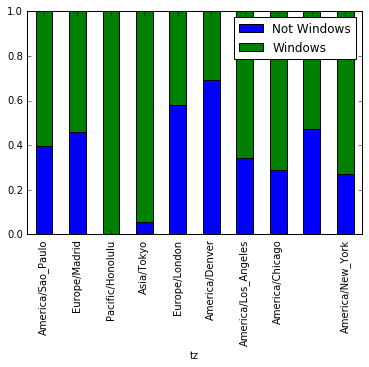

In [106]:
normed_subset.plot(kind='bar', stacked=True)

In [8]:
cd /home/topo/repos/ghub/pydata-book/ch02/movielens

/home/topo/repos/ghub/pydata-book/ch02/movielens


In [9]:
# Movie_lens dataset


import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None,
names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None,
names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None,
names=mnames)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


/home/topo/repos/ghub/pynotebooks


In [10]:
users.count()

user_id       6040
gender        6040
age           6040
occupation    6040
zip           6040
dtype: int64

In [14]:
movies.count()

movie_id    3883
title       3883
genres      3883
dtype: int64

In [12]:
ratings.count()

user_id      1000209
movie_id     1000209
rating       1000209
timestamp    1000209
dtype: int64

In [15]:
data = pd.merge(pd.merge(ratings, users), movies)

In [28]:
print data.shape
print data.count()

(1000209, 10)
user_id       1000209
movie_id      1000209
rating        1000209
timestamp     1000209
gender        1000209
age           1000209
occupation    1000209
zip           1000209
title         1000209
genres        1000209
dtype: int64


In [17]:
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [19]:
data[:1]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In [20]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [40]:
#mean rating by gender - updated as per current method...the one in book is not working anymore
import numpy as np
mean_ratings = pd.pivot_table(data, values='rating', index=['gender'], columns=['title'], aggfunc=np.mean)
print mean_ratings[:2]

title   $1,000,000 Duck (1971)  'Night Mother (1986)  \
gender                                                 
F                     3.375000              3.388889   
M                     2.761905              3.352941   

title   'Til There Was You (1997)  'burbs, The (1989)  \
gender                                                  
F                        2.675676            2.793478   
M                        2.733333            2.962085   

title   ...And Justice for All (1979)  1-900 (1994)  \
gender                                                
F                            3.828571             2   
M                            3.689024             3   

title   10 Things I Hate About You (1999)  101 Dalmatians (1961)  \
gender                                                             
F                                3.646552               3.791444   
M                                3.311966               3.500000   

title   101 Dalmatians (1996)  12 Angry Men (1957)  

In [37]:
#unstack and print, else it'll print as above
print mean_ratings[:5].unstack()

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                            M         2.733333
'burbs, The (1989)                          F         2.793478
                                            M         2.962085
...And Justice for All (1979)               F         3.828571
                                            M         3.689024
1-900 (1994)                                F         2.000000
                                            M         3.000000
10 Things I Hate About You (1999)           F         3.646552
                                            M         3.311966
101 Dalmatians (1961)                       F         3.791444
    

In [30]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.tools.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in the
    pivot table will be stored in MultiIndex objects (hierarchical indexes) on
    the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : a column, Grouper, array which has the same length as data, or list of them.
        Keys to group by on the pivot table index.
        If an array is passed, it is being used as the same manner as column values.
    columns : a column, Grouper, array which has the same length as data, or list of them.
        Keys to group by on the pivot table column.
        If an array is passed, it is being used as the same manner as column values.
    aggfunc : function, default numpy.mean, 

In [41]:
ratings_by_title = data.groupby('title').size()

In [42]:
print ratings_by_title

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

In [43]:
print data.groupby('gender').size()

gender
F    246440
M    753769
dtype: int64


In [51]:
#movies with ratings >250
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [49]:
(ratings_by_title > 250)[:5]

title
$1,000,000 Duck (1971)           False
'Night Mother (1986)             False
'Til There Was You (1997)        False
'burbs, The (1989)                True
...And Justice for All (1979)    False
dtype: bool

In [50]:
ratings_by_title[ratings_by_title >250]

title
'burbs, The (1989)                                                     303
10 Things I Hate About You (1999)                                      700
101 Dalmatians (1961)                                                  565
101 Dalmatians (1996)                                                  364
12 Angry Men (1957)                                                    616
13th Warrior, The (1999)                                               750
2 Days in the Valley (1996)                                            286
20,000 Leagues Under the Sea (1954)                                    575
2001: A Space Odyssey (1968)                                          1716
2010 (1984)                                                            470
28 Days (2000)                                                         505
39 Steps, The (1935)                                                   253
54 (1998)                                                              259
7th Voyage of Sinba

In [52]:
active_titles[:5]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)'],
      dtype='object', name=u'title')

In [54]:
# pick mean_ratings for active_titles only
mean_ratings = mean_ratings.ix[active_titles]

In [55]:
mean_ratings[:5]

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1961),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='mean')

TypeError: pivot_table() got an unexpected keyword argument 'rows'